In [8]:
import numpy as np
import pulp

# create the LP object, set up as a maximization problem
prob = pulp.LpProblem('Giapetto', pulp.LpMaximize)

# set up decision variables
red = pulp.LpVariable('soldiers', lowBound=0, cat='Integer')
blue = pulp.LpVariable('trains', lowBound=0, cat='Integer')

In [9]:
# model weekly production costs
raw_material_costs = 10 * soldiers + 9 * trains
variable_costs = 14 * soldiers + 10 * trains

# model weekly revenues from umbrella sales
revenues = 27 * red + 21 * blue

# use weekly profit as the objective function to maximize
profit = revenues - (raw_material_costs + variable_costs)
prob += profit  # here's where we actually add it to the obj function

In [10]:
# add constraints for available labor hours
carpentry_hours = soldiers + trains
prob += (carpentry_hours <= 80)

finishing_hours = 2*soldiers + trains
prob += (finishing_hours <= 100)

# add constraint representing demand for soldiers
prob += (soldiers <= 40)

In [11]:
print(prob)

Giapetto:
MAXIMIZE
27*soldiers + -24*soldiers + 21*trains + -19*trains + 0
SUBJECT TO
_C1: soldiers + trains <= 80

_C2: 2 soldiers + trains <= 100

_C3: soldiers <= 40

VARIABLES
0 <= soldiers Integer
0 <= soldiers Integer
0 <= trains Integer
0 <= trains Integer



In [12]:
# solve the LP using the default solver
optimization_result = prob.solve()

# make sure we got an optimal solution
assert optimization_result == pulp.LpStatusOptimal

# display the results
for var in (soldiers, trains):
    print('Optimal weekly number of {} to produce: {:1.0f}'.format(var.name, var.value()))

PulpSolverError: Pulp: Error while executing /usr/local/lib/python3.6/site-packages/pulp/solverdir/cbc/osx/64/cbc

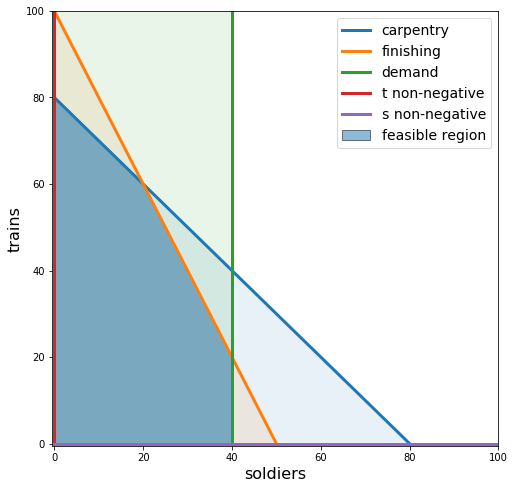

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# use seaborn to change the default graphics to something nicer
# and set a nice color palette
import seaborn as sns
#sns.set_color_palette('Set1')

# create the plot object
fig, ax = plt.subplots(figsize=(8, 8))
s = np.linspace(0, 100)

# add carpentry constraint: trains <= 80 - soldiers
plt.plot(s, 80 - s, lw=3, label='carpentry')
plt.fill_between(s, 0, 80 - s, alpha=0.1)

# add finishing constraint: trains <= 100 - 2*soldiers
plt.plot(s, 100 - 2 * s, lw=3, label='finishing')
plt.fill_between(s, 0, 100 - 2 * s, alpha=0.1)

# add demains constraint: soldiers <= 40
plt.plot(40 * np.ones_like(s), s, lw=3, label='demand')
plt.fill_betweenx(s, 0, 40, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(s), s, lw=3, label='t non-negative')
plt.plot(s, np.zeros_like(s), lw=3, label='s non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (0., 80.),
    (20., 60.),
    (40., 20.),
    (40., 0.),
    (0., 0.),
])
patch = PathPatch(path, label='feasible region', alpha=0.5)
ax.add_patch(patch)

# labels and stuff
plt.xlabel('soldiers', fontsize=16)
plt.ylabel('trains', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=14)
plt.show()

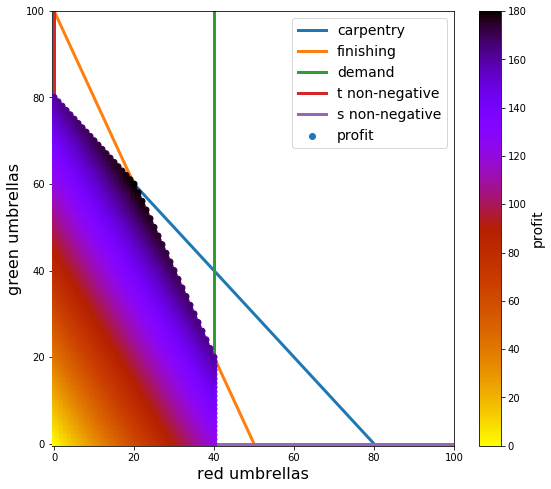

In [18]:
fig, ax = plt.subplots(figsize=(9, 8))
s = np.linspace(0, 100)

# plot the constraints again
plt.plot(s, 80 - s, lw=3, label='carpentry')
plt.plot(s, 100 - 2 * s, lw=3, label='finishing')
plt.plot(40 * np.ones_like(s), s, lw=3, label='demand')
plt.plot(np.zeros_like(s), s, lw=3, label='t non-negative')
plt.plot(s, np.zeros_like(s), lw=3, label='s non-negative')

# plot the possible (s, t) pairs
pairs = [(s, t) for s in np.arange(101)
                for t in np.arange(101)
                if (s + t) <= 80
                and (2 * s + t) <= 100
                and s <= 40]

# split these into our variables
ss, ts = np.hsplit(np.array(pairs), 2)

# caculate the objective function at each pair
z = 3*ss + 2*ts  # the objective function

# plot the results
plt.scatter(ss, ts, c=z, cmap='gnuplot_r', label='profit', zorder=3)

# labels and stuff
cb = plt.colorbar()
cb.set_label('profit', fontsize=14)
plt.xlabel('red umbrellas', fontsize=16)
plt.ylabel('green umbrellas', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=14)
plt.show()

plt.show()